In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [52]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [53]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Target Tanıma

In [54]:
df_train['SalePrice'].describe()  

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

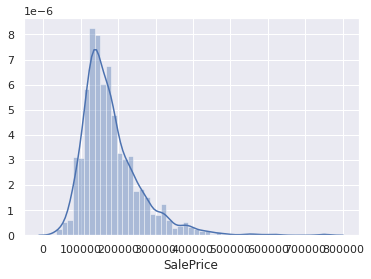

In [55]:
sns.distplot(df_train['SalePrice'])

In [56]:
print("Skewness %f" % df_train['SalePrice'].skew())
print("Kurtosis %f "%df_train['SalePrice'].kurt())

Skewness 1.882876
Kurtosis 6.536282 


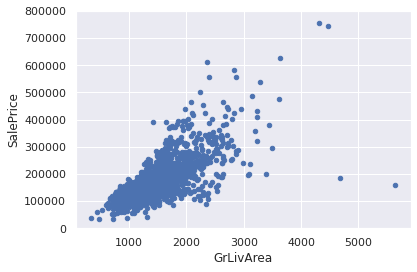

In [57]:
var ='GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

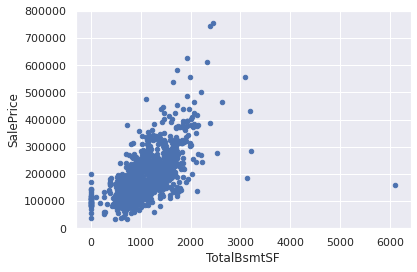

In [58]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis = 1)
data.plot.scatter(x = var,y='SalePrice',ylim = (0,800000))

(-0.5, 9.5, 0.0, 800000.0)

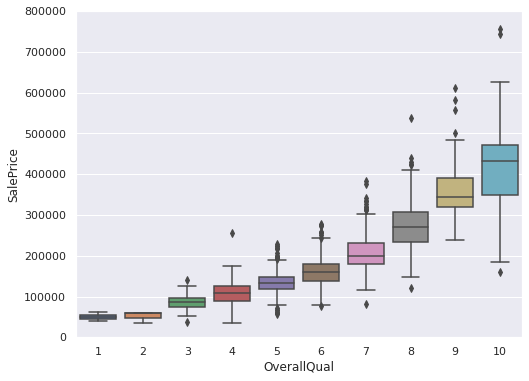

In [59]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax = 800000)

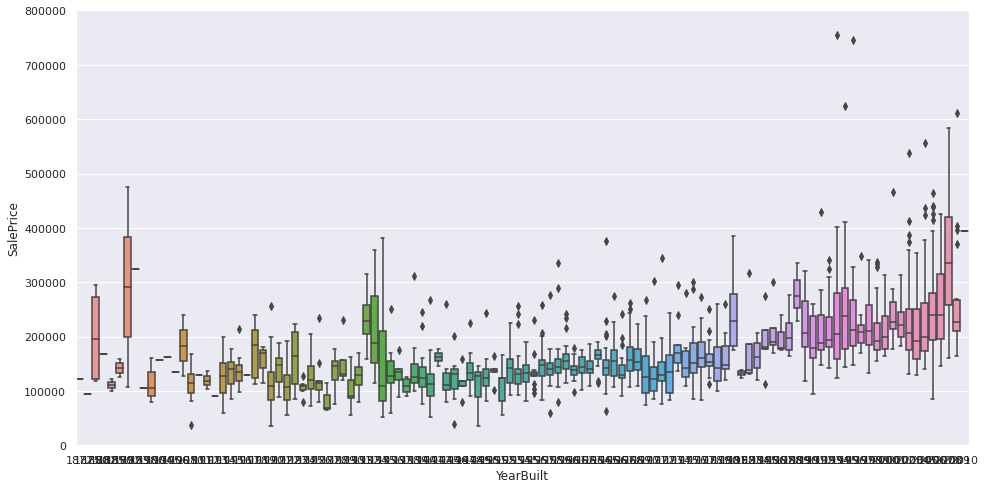

In [60]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f,ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0, ymax=800000);


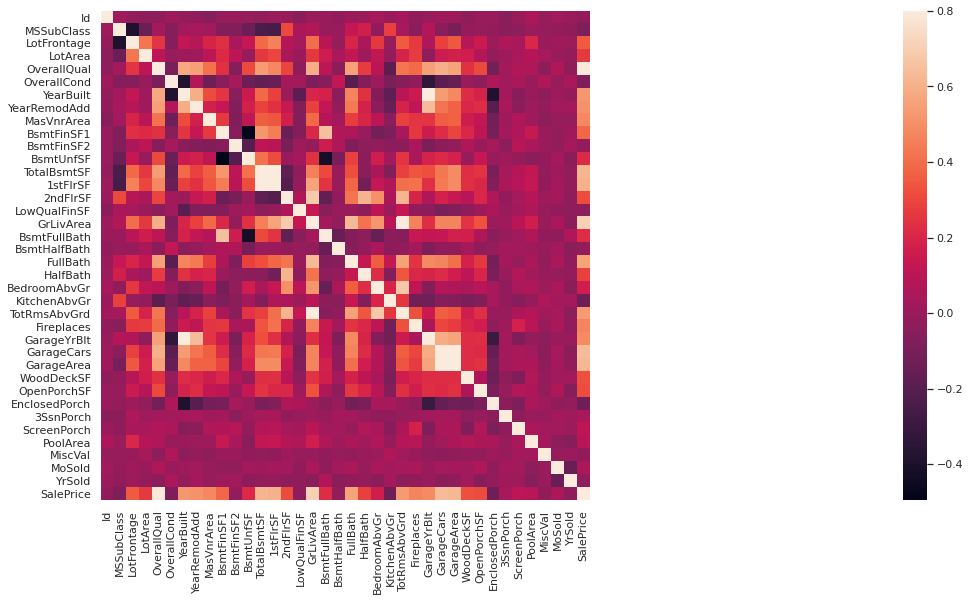

In [61]:
corrmat = df_train.corr()
f,ax = plt.subplots(figsize=(112,9))
sns.heatmap(corrmat,vmax=.8,square=True)

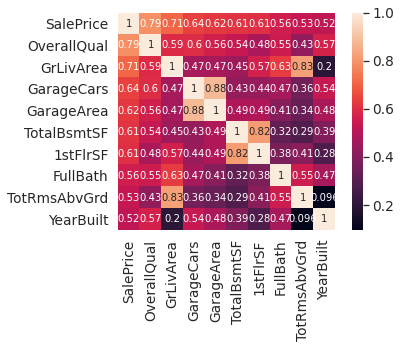

In [62]:
k = 10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar =True,annot=True,square=True,annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

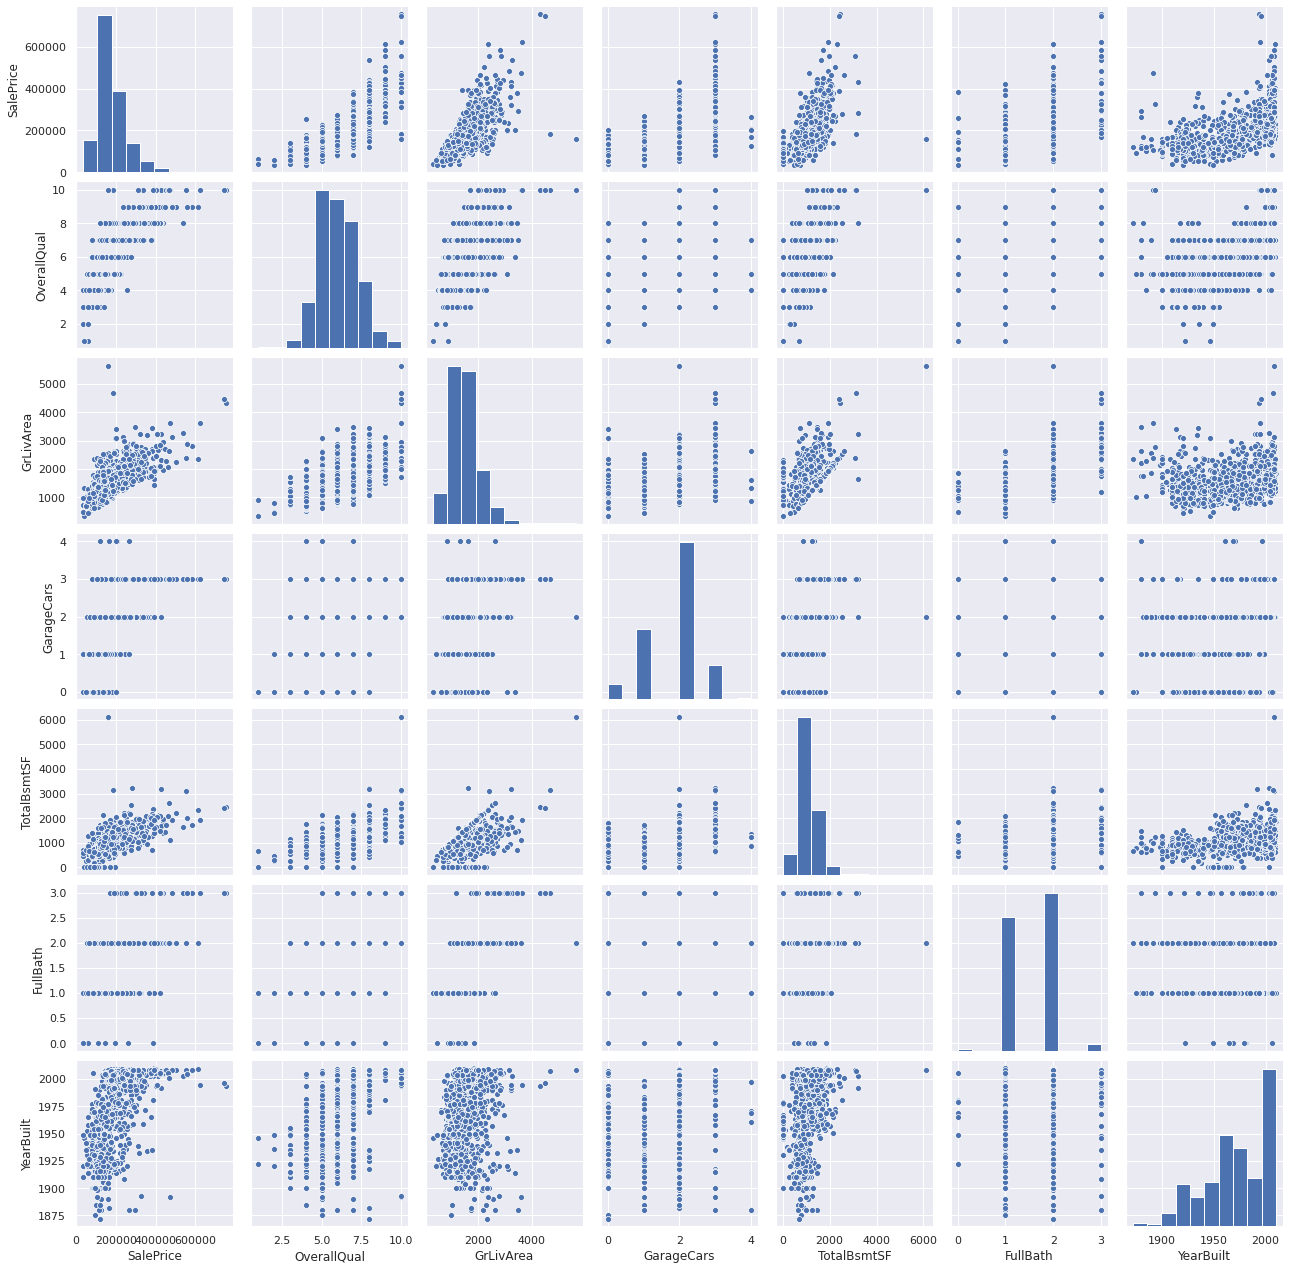

In [63]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols],size=2.5)
plt.show()

In [64]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=True)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [65]:
df_train = df_train.drop(missing_data[missing_data['Total']>1].index,axis =1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

In [73]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


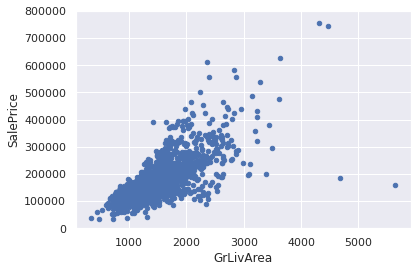

In [77]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

In [79]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [80]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

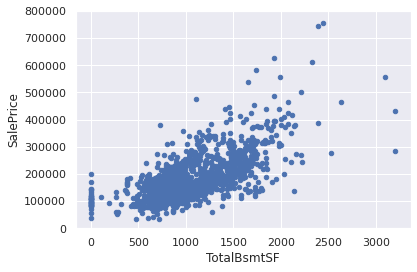

In [81]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Normallik Testi

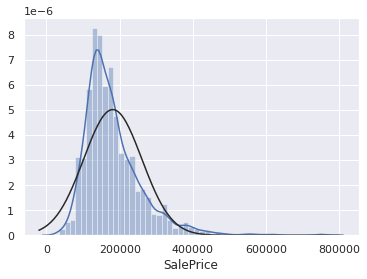

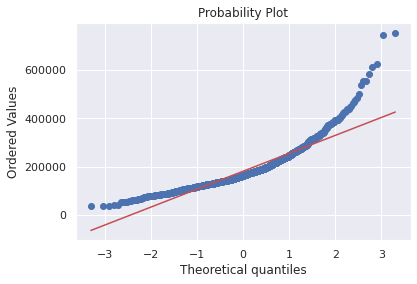

In [84]:
sns.distplot(df_train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot =plt)

In [85]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

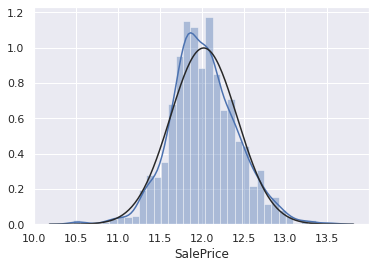

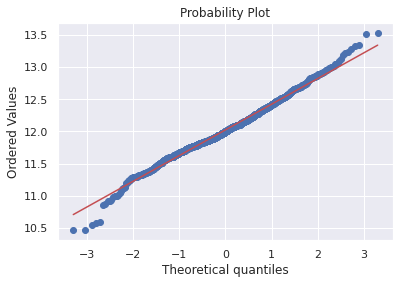

In [87]:
sns.distplot(df_train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot = plt)

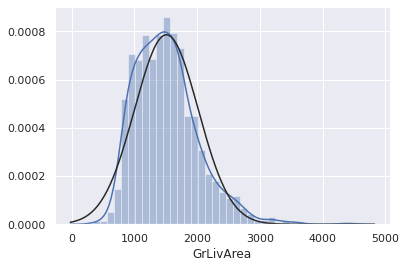

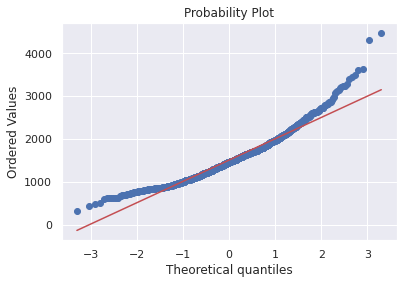

In [89]:
sns.distplot(df_train['GrLivArea'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [90]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

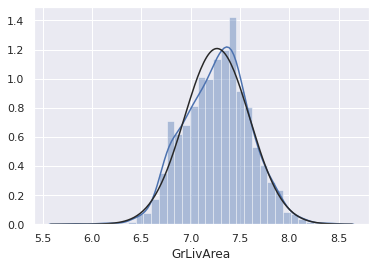

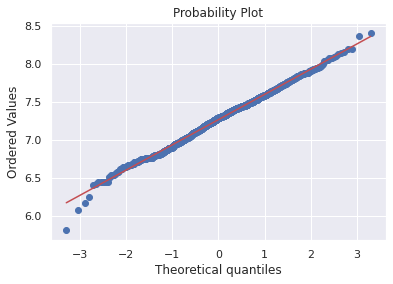

In [91]:
sns.distplot(df_train['GrLivArea'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'],plot = plt)

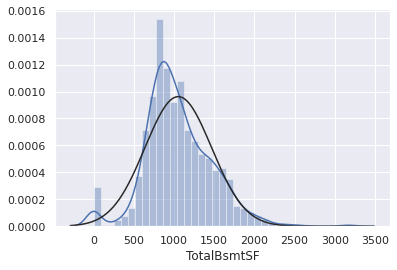

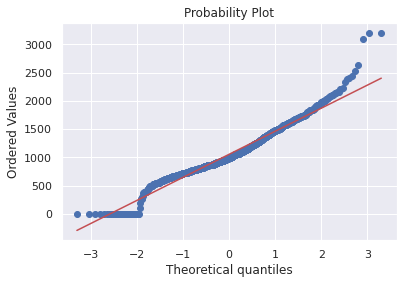

In [92]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [99]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']),index = df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1



In [100]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

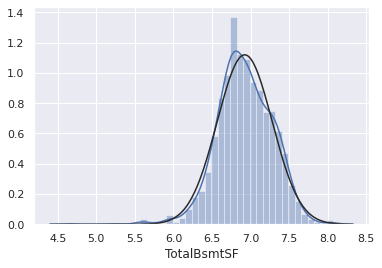

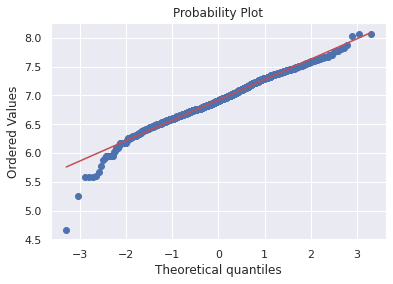

In [102]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [111]:
df_train= pd.get_dummies(df_train)
df_train.shape

(1457, 222)

In [119]:
X = df_train.drop('SalePrice',axis =1)
y = df_train['SalePrice']
X.shape

(1457, 221)

In [120]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [135]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X_train,y_train)
y_pred =rf.predict(X_test)
print("MAE :" ,mean_absolute_error(y_pred,y_test))


MAE : 0.09528867109420609


In [137]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor().fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("MAE :" ,mean_absolute_error(y_pred,y_test))

MAE : 0.15371956393417419


In [138]:
from xgboost import XGBClassifier
xg = XGBClassifier().fit(X_train,y_train)
y_pred = xg.predict(X_test)
print("MAE :" ,mean_absolute_error(y_pred,y_test))

MAE : 0.18134079604606892


In [142]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor().fit(X_train,y_train)
y_pred = lgb.predict(X_test)
print("MAE :" ,mean_absolute_error(y_pred,y_test))

MAE : 0.09100947731435306


In [ ]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(iterations=20).fit(X_train,y_train)
y_pred =cb.predict(X_test)
print("MAE :" ,mean_absolute_error(y_pred,y_test))

Learning rate set to 0.079203
0:	learn: 6.2420514	total: 2.58s	remaining: 42m 57s
1:	learn: 6.2127202	total: 5.61s	remaining: 46m 37s
2:	learn: 6.1850510	total: 8.17s	remaining: 45m 15s
3:	learn: 6.1596536	total: 10.4s	remaining: 43m 9s
4:	learn: 6.1294613	total: 12.9s	remaining: 42m 53s
5:	learn: 6.1025338	total: 15.9s	remaining: 43m 53s
6:	learn: 6.0744982	total: 18.5s	remaining: 43m 43s
